In [28]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [89]:
df = pd.read_csv('/shared/2/projects/cross-lingual-exchange/results/user_multilingual_thresholds.tsv',sep='\t')

AttributeError: 'DataFrame' object has no attribute 'read_csv'

In [90]:
df_thresh = pd.read_csv('/shared/2/projects/cross-lingual-exchange/results/betw_mean_vary_thresholds.tsv',sep='\t')


In [91]:
df_thresh

,Unnamed: 0,Threshold,Mean,Std. Error,Difference
0,0,0.000,0.413154,0.000062,NaN
1,1,0.005,0.513376,0.000280,0.106884
2,2,0.010,0.455283,0.000297,0.044341
3,3,0.015,0.434472,0.000317,0.022258
4,4,0.020,0.424490,0.000336,0.011772
...,...,...,...,...,...
96,96,0.480,0.264535,0.006060,-0.148629
97,97,0.485,0.247781,0.006164,-0.165383
98,98,0.490,0.237921,0.006146,-0.175243
99,99,0.495,0.232699,0.006161,-0.180465


In [44]:
df['scaled_betw'].quantile([.1,.25,.5,.75,.9,.95,.99,.999,.9999,.99999])

0.10000       0.000000
0.25000       0.000000
0.50000       0.024825
0.75000       0.357177
0.90000       1.759425
0.95000       4.814165
0.99000      39.692734
0.99900     269.666302
0.99990    1318.852645
0.99999    7441.298725
Name: scaled_betw, dtype: float64

In [56]:
df['log_betw'].quantile([.1,.25,.5,.75,.9,.95,.99,.999,.9999,.99999])

0.10000    0.000000
0.25000    0.000000
0.50000    0.024522
0.75000    0.305407
0.90000    1.015022
0.95000    1.760297
0.99000    3.706050
0.99900    5.600887
0.99990    7.185275
0.99999    8.914935
Name: log_betw, dtype: float64

In [55]:
df['log_betw'] = np.log(df['scaled_betw']+1)

In [4]:
df_small = df.sample(1000)

In [5]:
df_small

,Unnamed: 0,uid,scaled_betw,multilingual_threshold
2832489,2832489,2601869700,0.000000,0.000000
232371584,2747498,2287661913,0.170231,0.000000
116196499,2941249,957969432567074816,0.000000,0.000000
259152932,423180,848882947092566018,2.082982,0.016827
298509734,435445,1002967890218364934,0.271144,0.061224
...,...,...,...,...
122654628,1877761,1018196559132061699,0.072527,0.008097
126006848,5229981,813003519557074944,0.005161,0.009615
70133790,148080,18836172,0.000000,0.000000
42148420,676479,724146540,0.373655,0.000000


In [13]:
thresh_list = [i/200 for i in range(101)]

In [97]:
res = [] 
for thresh in thresh_list:
    df_thresh = df[df['multilingual_threshold'] >= thresh]
    res.append((thresh,df_thresh['log_betw'].median()))

In [99]:
df_res = pd.DataFrame(res,columns=['Threshold','Median Betweenness (Log-Scaled)'])

In [95]:
df_thresh[df_thresh['Threshold']==0.1]

,Unnamed: 0,Threshold,Mean,Std. Error,Difference
20,20,0.1,0.393272,0.000624,-0.020096


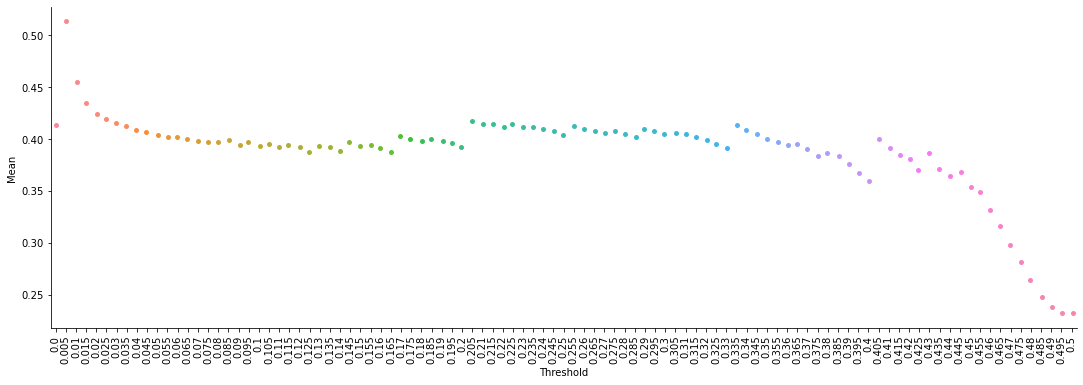

In [93]:
sns.catplot(x='Threshold',y='Mean',data=df_thresh,aspect=3)
plt.xticks(rotation=90)
plt.show()

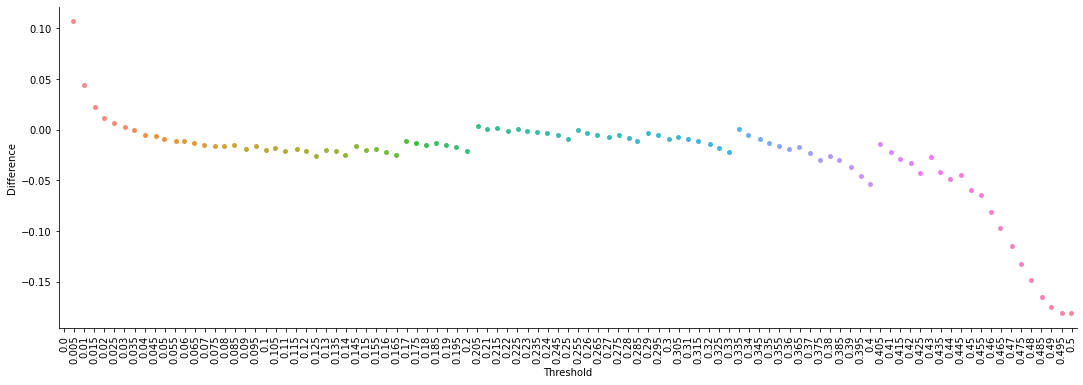

In [94]:
sns.catplot(x='Threshold',y='Difference',data=df_thresh,aspect=3)
plt.xticks(rotation=90)
plt.show()

In [46]:
res2 = [] 
for thresh in thresh_list:
    df_thresh = df_small[df_small['multilingual_threshold'] >= thresh]
    res2.append((thresh,df_thresh['scaled_betw'].median()))

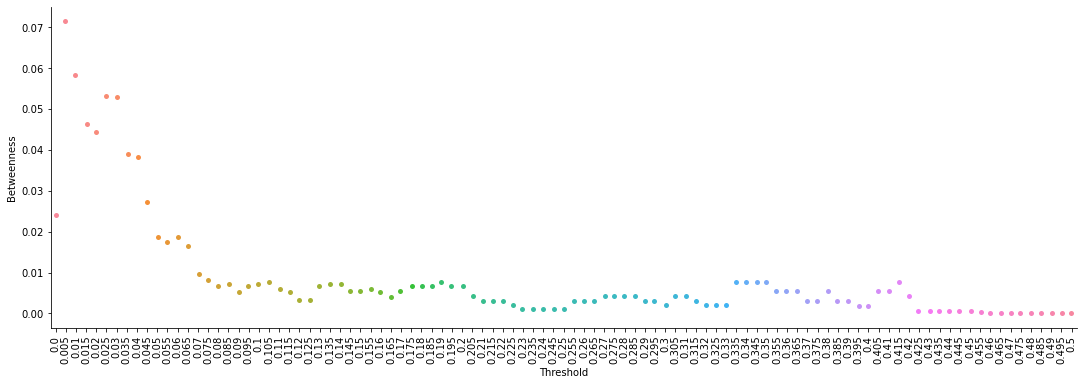

In [47]:
sns.catplot(x='Threshold',y='Betweenness',data=pd.DataFrame(res2,columns=['Threshold','Betweenness']),aspect=3)
plt.xticks(rotation=90)
plt.show()

In [52]:
import numpy as np

In [54]:
np.log(df_small['scaled_betw']+1)

2832489      0.000000
232371584    0.157201
116196499    0.000000
259152932    1.125897
298509734    0.239917
               ...   
122654628    0.070017
126006848    0.005148
70133790     0.000000
42148420     0.317475
275065709    0.003589
Name: scaled_betw, Length: 1000, dtype: float64

In [61]:
df

,Unnamed: 0,uid,scaled_betw,multilingual_threshold,log_betw
0,0,1002331874,0.707735,0.030303,0.535168
1,1,208710267,0.438939,0.000000,0.363906
2,2,866579156,0.155011,0.000000,0.144110
3,3,248800745,0.217391,0.047619,0.196710
4,4,464682995,0.077391,0.043478,0.074542
...,...,...,...,...,...
306395143,1761862,464151739,0.000000,0.000000,0.000000
306395144,1761863,165711052,0.000000,0.000000,0.000000
306395145,1761864,1002334459,0.097354,0.051282,0.092902
306395146,1761865,1087258700513980416,0.000866,0.071429,0.000865


In [83]:
df[df['multilingual_threshold']<0.1].median()

Unnamed: 0                1.115192e+06
uid                       1.110397e+09
scaled_betw               2.718443e-02
multilingual_threshold    0.000000e+00
log_betw                  2.682150e-02
dtype: float64

In [84]:
df[df['multilingual_threshold']>=0.1].median()

Unnamed: 0                8.424960e+05
uid                       1.467759e+09
scaled_betw               1.347821e-02
multilingual_threshold    1.880342e-01
log_betw                  1.338819e-02
dtype: float64

In [85]:
df[df['multilingual_threshold']<0.2].median()

Unnamed: 0                1.089546e+06
uid                       1.160354e+09
scaled_betw               2.673548e-02
multilingual_threshold    0.000000e+00
log_betw                  2.638433e-02
dtype: float64

In [86]:
df[df['multilingual_threshold']>=0.2].median()

Unnamed: 0                8.647360e+05
uid                       1.107000e+09
scaled_betw               7.488073e-03
multilingual_threshold    2.857143e-01
log_betw                  7.460177e-03
dtype: float64

In [87]:
df[df['multilingual_threshold']<0.15].median()

Unnamed: 0                1.097887e+06
uid                       1.145538e+09
scaled_betw               2.688136e-02
multilingual_threshold    0.000000e+00
log_betw                  2.652640e-02
dtype: float64

In [88]:
df[df['multilingual_threshold']>=0.15].median()

Unnamed: 0                8.445970e+05
uid                       1.267691e+09
scaled_betw               9.947479e-03
multilingual_threshold    2.500000e-01
log_betw                  9.898329e-03
dtype: float64

In [82]:
df_small.sort_values(by='multilingual_threshold',ascending=False)

,Unnamed: 0,uid,scaled_betw,multilingual_threshold
194819214,2024649,289845325,0.247721,0.5
109222861,1836785,3309612189,0.000000,0.5
282020555,1203676,2799961034,0.000000,0.5
181139871,1515454,501770182,0.000000,0.5
139604371,429643,1397968333,0.000568,0.5
...,...,...,...,...
272507637,1517765,471838619,0.212114,0.0
15604250,1506441,228495602,0.203849,0.0
146707355,2300609,544813899,0.399105,0.0
288235621,1755036,319873692,0.000000,0.0
